In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score

In [ ]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Display dataset info
print("Data Info:")
df.info()
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
# Define features (X) and target (y)
X = df.drop('species', axis=1) # Features
y = df['species'] # Target
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (105, 4)
Testing set shape: (45, 4)


In [ ]:
# Initialize the Gaussian Naïve Bayes model
nb_model = GaussianNB()
# Train the model
nb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
import pandas as pd
print(pd.Series(y_train).value_counts()) # Assuming y_train is your training labels

species
versicolor    37
virginica     37
setosa        31
Name: count, dtype: int64


In [ ]:
print("y_test (True Labels):")
print(y_test)
print("\ny_pred (Predicted Labels):")
print(y_pred)

y_test (True Labels):
73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
22         setosa
15         setosa
65     versicolor
11         setosa
42         setosa
146     virginica
51     versicolor
27         setosa
4          setosa
32         setosa
142     virginica
85     versicolor
86     versicolor
16         setosa
10         setosa
Name: species, dtype: object

y_pred (Predicted Labels):
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'v

In [ ]:
import numpy as np

print("Unique Labels in y_test:", np.unique(y_test))
print("Unique Labels in y_pred:", np.unique(y_pred))

Unique Labels in y_test: ['setosa' 'versicolor' 'virginica']
Unique Labels in y_pred: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("Model Classes:", nb_model.classes_)

Model Classes: ['setosa' 'versicolor' 'virginica']


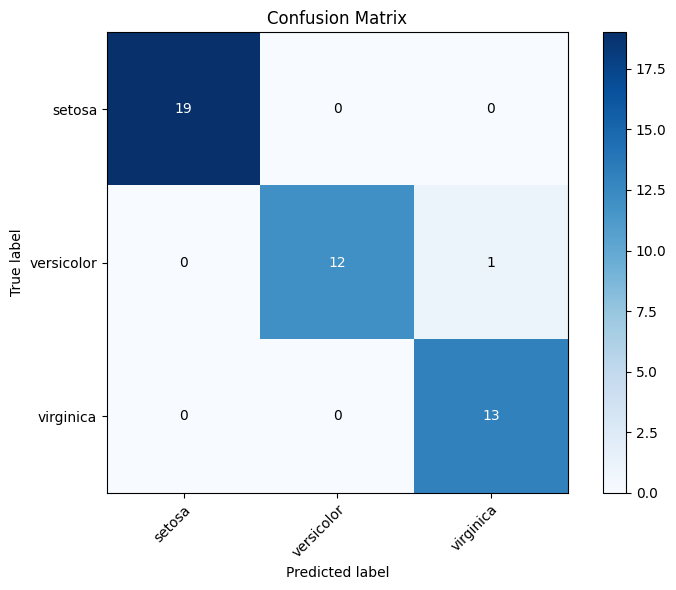

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming 'cm' is your confusion matrix and 'nb_model.classes_' are defined

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Display the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add a colorbar
ax.figure.colorbar(im, ax=ax)

# Set labels, title, and ticks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=nb_model.classes_,
       yticklabels=nb_model.classes_,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

# Assuming y_test, y_pred, and nb_model are already defined

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Extract TP, FP, TN, FN for each class from the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tp = np.diag(cm)  # True Positives for each class
fp = cm.sum(axis=0) - tp  # False Positives for each class
fn = cm.sum(axis=1) - tp  # False Negatives for each class
tn = cm.sum() - (tp + fp + fn)  # True Negatives for each class

# Display results
print("Evaluation Metrics:")
for i, class_name in enumerate(nb_model.classes_):
    print(f"Class: {class_name}")
    print(f"True Positives (TP): {tp[i]}")
    print(f"False Positives (FP): {fp[i]}")
    print(f"True Negatives (TN): {tn[i]}")
    print(f"False Negatives (FN): {fn[i]}")

print("\nOverall Metrics:")  # Added a newline for better formatting
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")  # Corrected line (removed the trailing 1)

Evaluation Metrics:
Class: setosa
True Positives (TP): 19
False Positives (FP): 0
True Negatives (TN): 26
False Negatives (FN): 0
Class: versicolor
True Positives (TP): 12
False Positives (FP): 0
True Negatives (TN): 32
False Negatives (FN): 1
Class: virginica
True Positives (TP): 13
False Positives (FP): 1
True Negatives (TN): 31
False Negatives (FN): 0

Overall Metrics:
Accuracy: 0.9778
Error Rate: 0.0222
Precision (macro): 0.9762
Recall (macro): 0.9744
